## Linear Regression

In [1]:
import sys
sys.path.insert(0, '..')

In [13]:
from sklearn.model_selection import train_test_split

from enums import GradientDescentMode, Initialization
from linear import Linear
from loss import MSELoss
from optimizers import SGD

import matplotlib.pyplot as plt
import numpy as np
import warnings

In [14]:
def eval_mse_fn(net, X_test, y_test):
    y_pred = net(X_test)
    return MSELoss()(y_pred, y_test).mean()

# Data

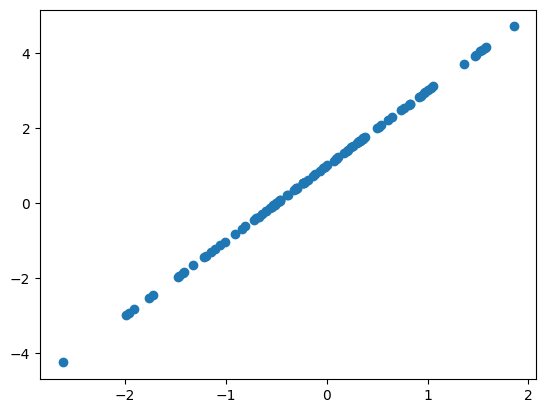

In [15]:
np.random.seed(42)

n_samples = 100
X = np.random.randn(n_samples)
y = 2 * X  + 1

plt.scatter(X, y)
plt.show()
X = X.reshape((-1, 1))


In [16]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=42)
print('Train :', X_train.shape, y_train.shape)
print('Validation :', X_val.shape, y_val.shape)

Train : (80, 1) (80,)
Validation : (20, 1) (20,)


In [17]:
net = Linear(1, 1)
lr = 1e-1
epochs = 200
loss = MSELoss()
all_loss, all_loss_valid, all_acc_valid, best_parameters = SGD(
    net,
    loss,
    lr,
    X_train,
    y_train,
    epochs,
    GradientDescentMode.BATCH,
    -1,
    eval_mse_fn,
    X_val,
    y_val
)

Train : -----------------------------------
Epoch 20: train loss: 0.012006305305273742 val loss: 0.006929897822338635 val eval_fn: 0.006929897822338635
Epoch 40: train loss: 1.0488581871450494e-05 val loss: 6.200000836957467e-06 val eval_fn: 6.200000836957467e-06
Epoch 60: train loss: 9.225996810168468e-09 val loss: 5.487934164654275e-09 val eval_fn: 5.487934164654275e-09
Epoch 80: train loss: 8.119485055532184e-12 val loss: 4.837840789120803e-12 val eval_fn: 4.837840789120803e-12
Epoch 100: train loss: 7.145943937811614e-15 val loss: 4.259695066676375e-15 val eval_fn: 4.259695066676375e-15
Epoch 120: train loss: 6.289149104858892e-18 val loss: 3.7494152580920336e-18 val eval_fn: 3.7494152580920336e-18
Epoch 140: train loss: 5.535061036118843e-21 val loss: 3.29995637503912e-21 val eval_fn: 3.29995637503912e-21
Epoch 160: train loss: 4.871122613574339e-24 val loss: 2.9041770683841677e-24 val eval_fn: 2.9041770683841677e-24
Epoch 180: train loss: 4.2837644699452824e-27 val loss: 2.548142

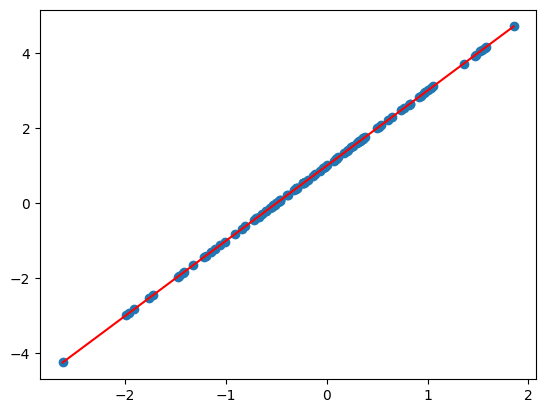

In [18]:
X = X.reshape(-1)
x_min, x_max = X.min(), X.max()
xs = np.linspace(x_min, x_max, 2)
ys = xs * net._parameters['W'].reshape(-1)[0] + net._parameters['b'].reshape(-1)[0] 
plt.plot(xs, ys, 'r-')
plt.scatter(X, y)

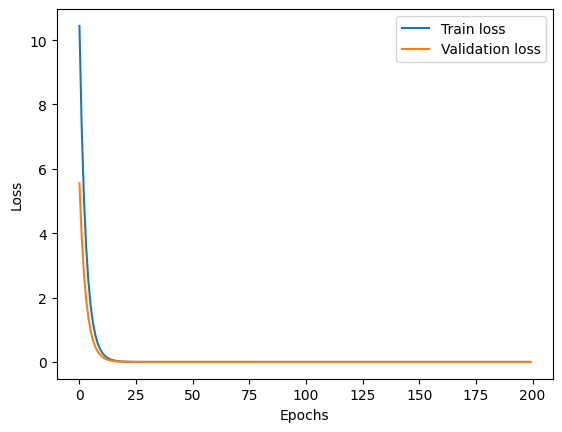

In [19]:
plt.plot(all_loss, label='Train loss')
plt.plot(all_loss_valid, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

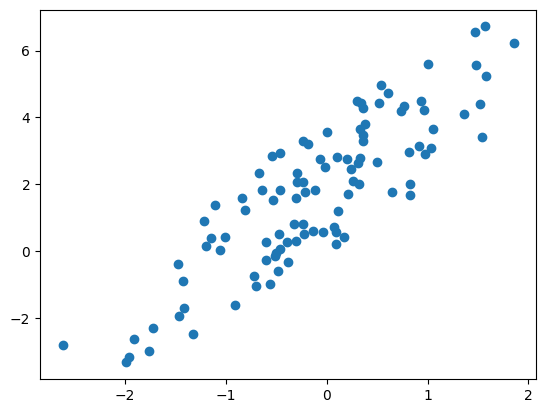

In [20]:
np.random.seed(42)

n_samples = 100
X = np.random.randn(n_samples)
y = 2 * X  + 4 * np.random.random(n_samples)

plt.scatter(X, y)
plt.show()
X = X.reshape((-1, 1))

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=42)
print('Train :', X_train.shape, y_train.shape)
print('Validation :', X_val.shape, y_val.shape)

Train : (80, 1) (80,)
Validation : (20, 1) (20,)


In [22]:
net = Linear(1, 1)
lr = 1e-1
epochs = 200
loss = MSELoss()
all_loss, all_loss_valid, all_acc_valid, best_parameters = SGD(
    net,
    loss,
    lr,
    X_train,
    y_train,
    epochs,
    GradientDescentMode.BATCH,
    -1,
    eval_mse_fn,
    X_val,
    y_val
)

Train : -----------------------------------
Epoch 20: train loss: 1.3297828298804917 val loss: 1.246400021965063 val eval_fn: 1.246400021965063
Epoch 40: train loss: 1.3218979894615455 val loss: 1.1978355149630597 val eval_fn: 1.1978355149630597
Epoch 60: train loss: 1.3218910764715628 val loss: 1.1965472974226157 val eval_fn: 1.1965472974226157
Epoch 80: train loss: 1.3218910703891322 val loss: 1.1965093130961608 val eval_fn: 1.1965093130961608
Epoch 100: train loss: 1.321891070383779 val loss: 1.196508187245307 val eval_fn: 1.196508187245307
Epoch 120: train loss: 1.3218910703837745 val loss: 1.1965081538526103 val eval_fn: 1.1965081538526103
Epoch 140: train loss: 1.3218910703837743 val loss: 1.1965081528620238 val eval_fn: 1.1965081528620238
Epoch 160: train loss: 1.3218910703837743 val loss: 1.1965081528326373 val eval_fn: 1.1965081528326373
Epoch 180: train loss: 1.321891070383774 val loss: 1.1965081528317656 val eval_fn: 1.1965081528317656
Epoch 200: train loss: 1.32189107038377

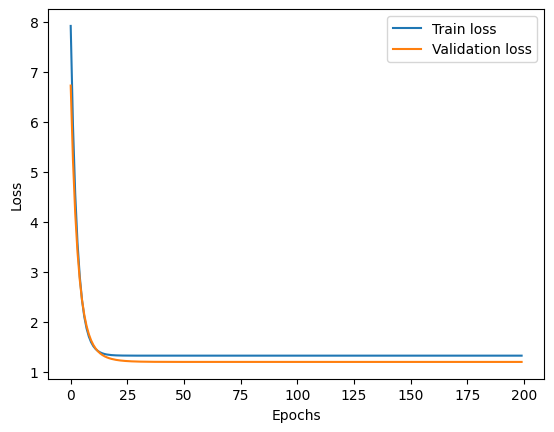

In [23]:
plt.plot(all_loss, label='Train loss')
plt.plot(all_loss_valid, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()